# Lab #2: Probability, Distributions, and Statistical Questions
#### Aidan Berres
#### Physics 434
#### 10/18/20
---

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sympy as sp

## Problem 1
I chose my X value to be 7 and my X value to be 10. In this problem we are going to be looking at how convolution can be used to sum and average probabilities of a distribution. We are using Poisson distributions which are distrete distributions with non-continuous values. The two parameters I am setting (X and Y) determine the daily average cosmic-ray background, and the average number of gamma-rays emitted by a simulated source. 

## 1. A)
Here we are using convolution to sum the original probabilities over multiple days.

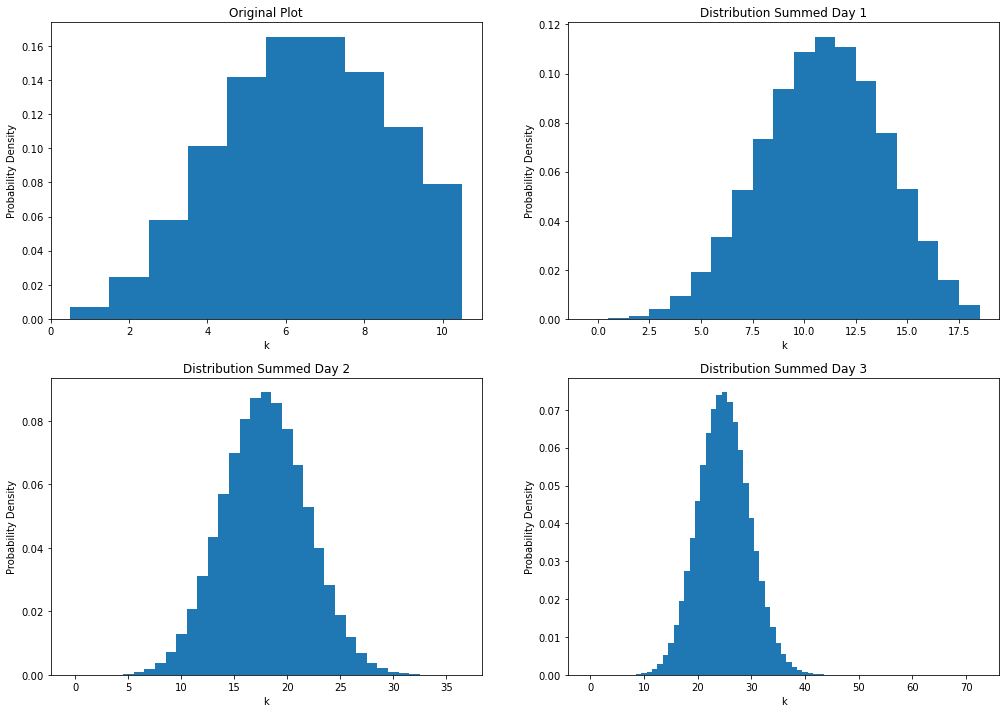

In [224]:
fig, ax = plt.subplots(2,2,figsize=(17,12))
X=7
Y=10
ax=ax.flatten()
x=np.arange(1,10+1)
ef=stats.poisson.pmf(x,mu=X)
ef=ef/ef.sum()
ax[0].set_title('Original Plot')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Probability Density')
ax[0].bar(x,ef,width=1)
for i in range(1,4):
    ef=np.convolve(ef,stats.poisson.pmf(x,X))
    x=np.arange(len(ef))
    ax[i].set_title(f'Distribution Summed Day {i}')
    ax[i].set_xlabel('k')
    ax[i].set_ylabel('Probability Density')
    ax[i].bar(x,ef,width=1)

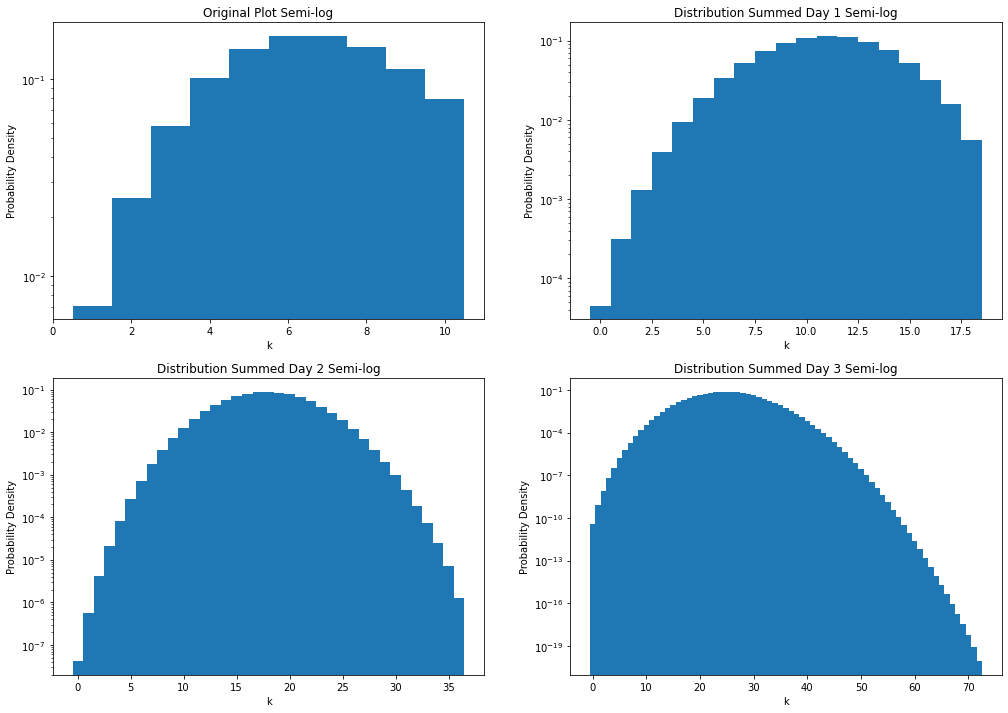

In [227]:
fig, ax = plt.subplots(2,2,figsize=(17,12))
X=7
Y=10
ax=ax.flatten()
x=np.arange(1,10+1)
ef=stats.poisson.pmf(x,mu=X)
ef=ef/ef.sum()
ax[0].set_yscale('log')
ax[0].set_title('Original Plot Semi-log')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Probability Density')
ax[0].bar(x,ef,width=1)
for i in range(1,4):
    ef=np.convolve(ef,stats.poisson.pmf(x,X))
    x=np.arange(len(ef))
    ax[i].set_yscale('log')
    ax[i].set_title(f'Distribution Summed Day {i} Semi-log')
    ax[i].set_xlabel('k')
    ax[i].set_ylabel('Probability Density')
    ax[i].bar(x,ef,width=1)

We can see as the days summed increases, that the distribution gets wider and shorter since we are adding more data points to the distributions and that more of the points are grouped near an average.

## 1. B)
Here we are looking at the average of the distribution after 5 days to determine that it is still a Poisson distribution.

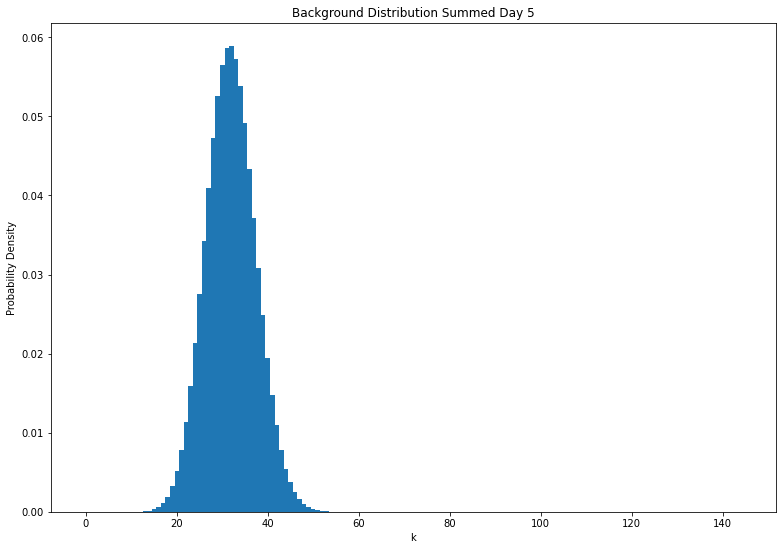

In [225]:
fig, ax = plt.subplots(1,1,figsize=(13,9))
X=7
Y=10
#ax=ax.flatten()
x=np.arange(1,10+1)
ef=stats.poisson.pmf(x,mu=X)
#ax[0].bar(x,ef,width=1)
for i in range(1,5):
    ef=np.convolve(ef,stats.poisson.pmf(x,X))
    x=np.arange(len(ef))
    #ax[i].bar(x,ef,width=1)
#ax.set_xlim(50,60)
ax.set_title('Background Distribution Summed Day 5')
ax.set_xlabel('k')
ax.set_ylabel('Probability Density')
ax.bar(x,ef,width=1);

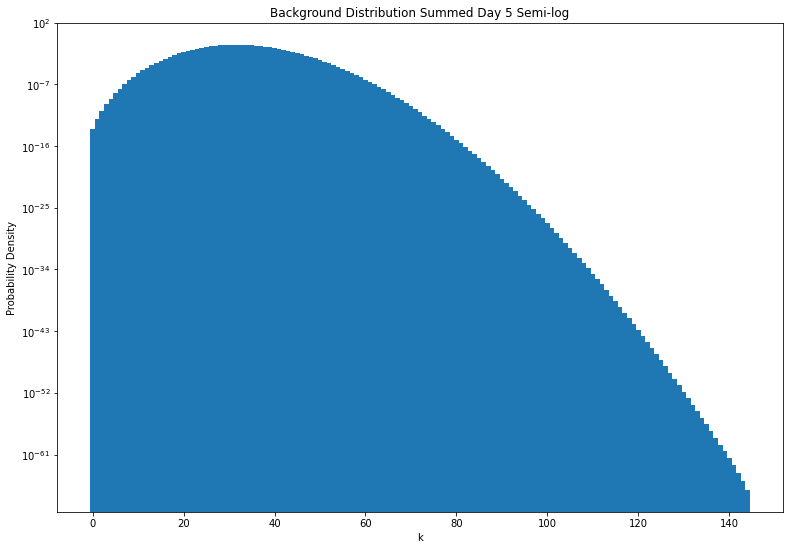

In [228]:
fig, ax = plt.subplots(1,1,figsize=(13,9))
X=7
Y=10
#ax=ax.flatten()
x=np.arange(1,10+1)
ef=stats.poisson.pmf(x,mu=X)
#ax[0].bar(x,ef,width=1)
for i in range(1,5):
    ef=np.convolve(ef,stats.poisson.pmf(x,X))
    x=np.arange(len(ef))
    #ax[i].bar(x,ef,width=1)
#ax.set_xlim(50,60)
ax.set_yscale('log')
ax.set_title('Background Distribution Summed Day 5 Semi-log')
ax.set_xlabel('k')
ax.set_ylabel('Probability Density')
ax.bar(x,ef,width=1);

Explain why this makes sense from a mathematical and conceptual point of view.

This makes sense mathematically if we look at the Poisson's Probability Mass Funtion,

$\displaystyle \Pr(X=k)={\frac {\lambda ^{k}e^{-\lambda }}{k!}}$

Where, $\lambda$ is the rate of events and k is the number of events, and we are finding the probability of the number of events occuring in a certain time frame.

For the sum of a Poisson random variable, the sums are Poisson distributed if the individual variables are distributed and are independent of each other. If they are independent, thus ${\displaystyle \sum _{i=1}^{n}X_{i}\sim \operatorname {Pois} \left(\sum _{i=1}^{n}\lambda _{i}\right)}$ 

thus we can say, 
$\displaystyle {\frac {\lambda_1 ^{k}e^{-\lambda_1 }}{k!}} + {\frac {\lambda_2 ^{k}e^{-\lambda_2 }}{k!}} = {\frac {(\lambda_1 +\lambda_2) ^{k}e^{-(\lambda_2 + \lambda_1)}}{k!}}$ 

which keeps the same form of equation for a Poisson PMF, which should reflect the distribution still even with the sums.
This also makes sense conceptually since we are just adding discrete values toghether and making a distribution from them.

## 1. C)
Here we are using convolution to average the original probabilities for multiple days.

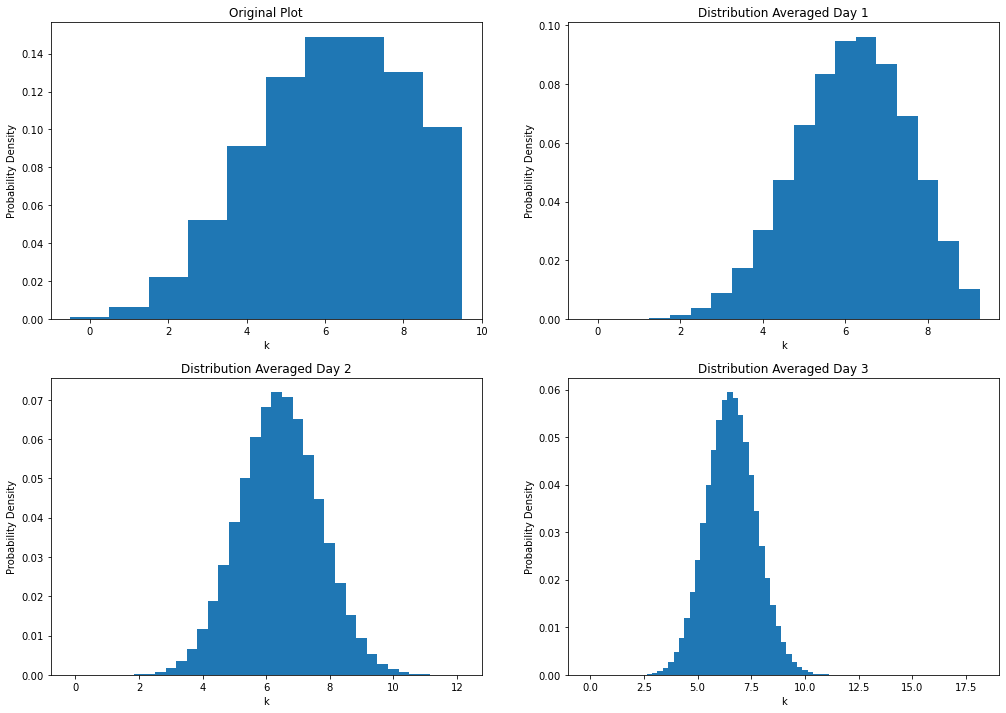

In [229]:
fig, ax = plt.subplots(2,2,figsize=(17,12))
X=7
Y=10
ax=ax.flatten()
x=np.arange(10)
ef=stats.poisson.pmf(x,mu=X)
ax[0].set_title('Original Plot')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Probability Density')
ax[0].bar(x,ef,width=1)
for i in range(1,4):
    ef=np.convolve(ef,stats.poisson.pmf(x,X))
    x=np.arange(len(ef))
    ax[i].set_title(f'Distribution Averaged Day {i}')
    ax[i].set_xlabel('k')
    ax[i].set_ylabel('Probability Density')
    ax[i].bar(x/(i+1),ef,width=1/(i+1))

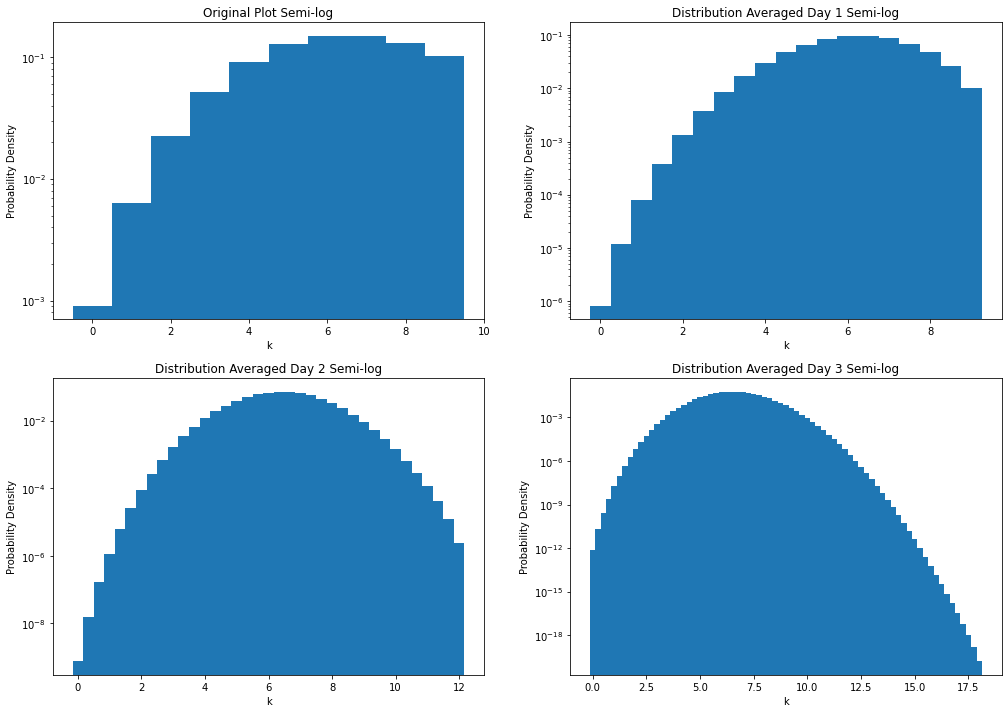

In [232]:
fig, ax = plt.subplots(2,2,figsize=(17,12))
X=7
Y=10
ax=ax.flatten()
x=np.arange(10)
ef=stats.poisson.pmf(x,mu=X)
ax[0].set_yscale('log')
ax[0].set_title('Original Plot Semi-log')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Probability Density')
ax[0].bar(x,ef,width=1)
for i in range(1,4):
    ef=np.convolve(ef,stats.poisson.pmf(x,X))
    x=np.arange(len(ef))
    ax[i].set_yscale('log')
    ax[i].set_title(f'Distribution Averaged Day {i} Semi-log')
    ax[i].set_xlabel('k')
    ax[i].set_ylabel('Probability Density')
    ax[i].bar(x/(i+1),ef,width=1/(i+1))

Discuss this in relation to both B) and the central limit theorem.

Similarly we see that as the days averaged increase we see the similar shape as with the sums in part B. However, the x-values of the distributions have to be scaled by the day due to them representing an average and not just a sum. So we can see that the distributions have gotten shorter but not too much wider especially on the last average. The central limit theorem tells us that as we continue averaging, the distribution will begin to take the shape of a Gaussian distribution. We can see this progression in our plots since the values get a little wider and shorter as it begins to distribute the values towards the wings of the distribution. 

## 1. D)
For this part I chose 5 days as my number of days. Since we have a average gamma-ray emitted value of 10, we can assume we saw gamma-rays Y*N = 50 from our source. Since Y is the average value for the number of gamma-rays produced per day, thus we multiply it by the number of days to find the average for 5 days. Furthermore, we have to multiply our daily cosimic-ray backgorund by the number of days so we are looking at the correct distribution for that day.

In [134]:
Y=10
N=5
yn=Y*N
m1=1-stats.poisson.cdf(yn,N*X)
siggy=stats.norm.ppf(1-m1)
siggy

2.481908839676195

We find our sigma value to be 2.48

---
## Problem 2
I chose a Rayleigh Distribution. For this portion we are averaging a skewed distribution multiple times to see how averaging over more observing intervals changes the distribution. A Rayleigh distribution is continuous distribution that looks like a skewed bell curve towards positive x-values, and its x-values are always greater than zero.

## 2. A)
In this part I am taking the original PDF of the distribution and averaging it over 3 intervals.

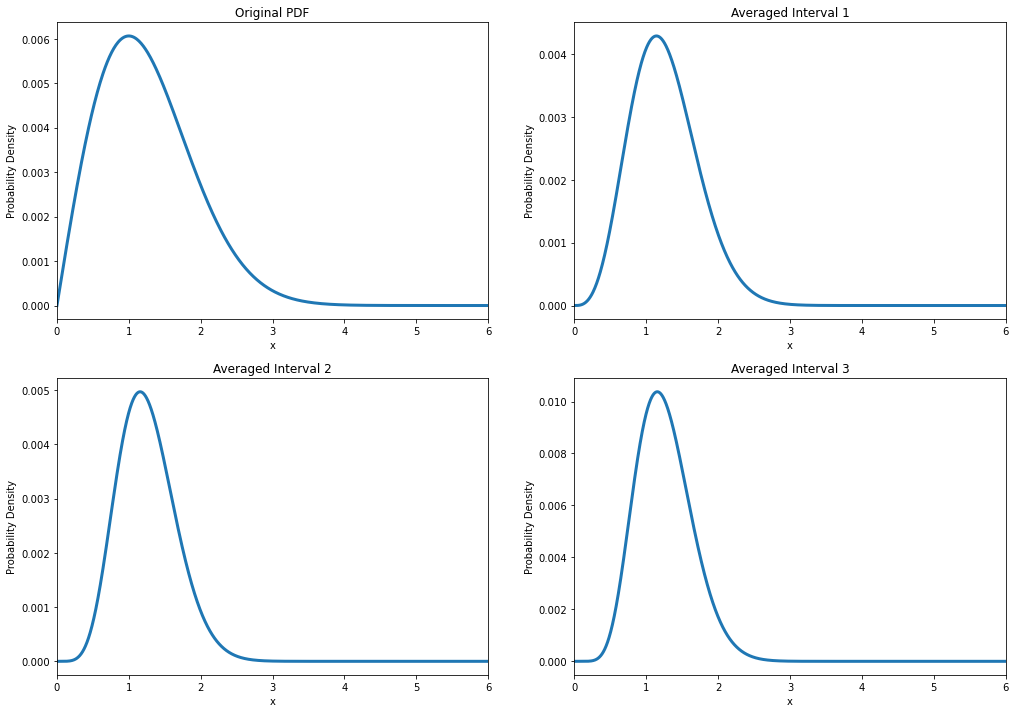

In [235]:
fig, ax = plt.subplots(2,2,figsize=(17,12))
ax=ax.flatten()
x=np.linspace(0,10,1000)
eff=stats.rayleigh.pdf(x)/100
ax[0].set_title('Original PDF')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Probability Density')
ax[0].set_xlim(0,6)
ax[0].plot(x,eff,linewidth=3)
for i in range(1,4):
    eff=np.convolve(eff,stats.rayleigh.pdf(x)/100)
    x=np.linspace(0,10,len(eff))
    ax[i].set_title(f'Averaged Interval {i}')
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('Probability Density')
    ax[i].set_xlim(0,6)
    ax[i].plot(x,eff,linewidth=3)

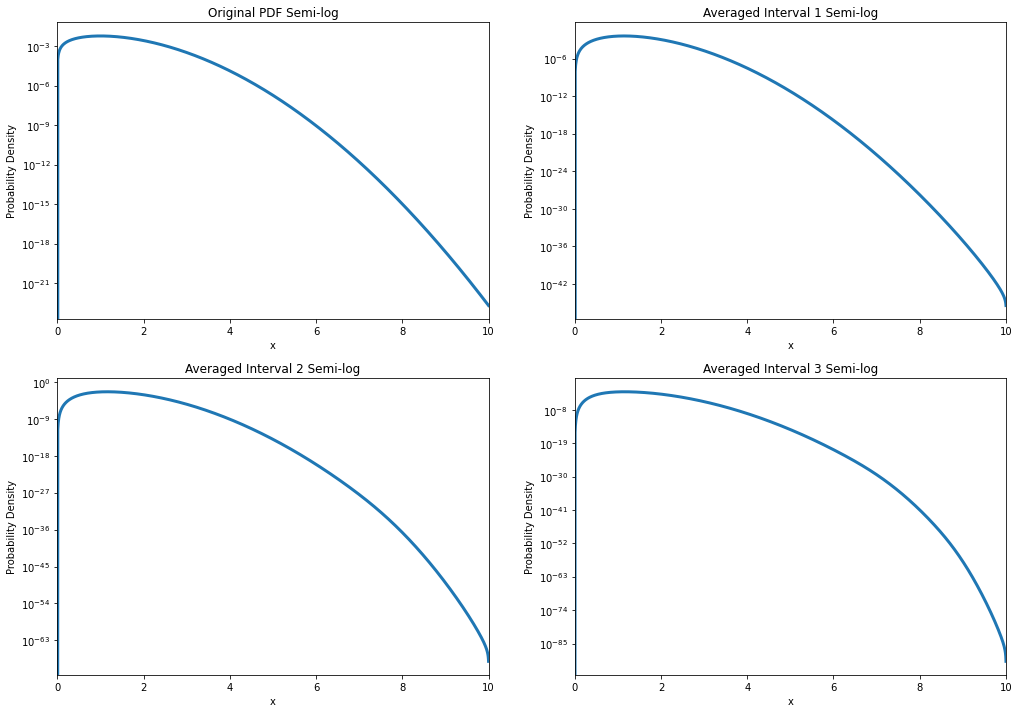

In [248]:
fig, ax = plt.subplots(2,2,figsize=(17,12))
ax=ax.flatten()
x=np.linspace(0,10,1000)
eff=stats.rayleigh.pdf(x)/100
ax[0].set_title('Original PDF Semi-log')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Probability Density')
ax[0].set_xlim(0,10)
ax[0].set_yscale('log')
ax[0].plot(x,eff,linewidth=3)
for i in range(1,4):
    eff=np.convolve(eff,stats.rayleigh.pdf(x)/100)
    x=np.linspace(0,10,len(eff))
    ax[i].set_title(f'Averaged Interval {i} Semi-log')
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('Probability Density')
    ax[i].set_xlim(0,10)
    ax[i].set_yscale('log')
    ax[i].plot(x,eff,linewidth=3)

## 2. B)
It seems after a few averaging intervals that it has less of a skew and are getting taller. It is seeming to approach a Gaussian distribution slowly since the values are tightening up towards an average value and the peaks are getting taller as more values crowd towards a central value.

## Problem 3

In this part we are using pixel counts and Gaussian distributions to find our signal location in a large amount of pixels. Later we will see how the probability of many pixels can help us find a significance of a signal from an unknown pixel location.

## Version 1

## 3. A)

In [244]:
w=4.20
sn=20
pr= 1-stats.norm.cdf(sn,scale=w)
print(f'Probability of {pr}')
sig=stats.norm.ppf(1-pr)
print(f"Sigma of {sig}")

Probability of 9.588709445340626e-07
Sigma of 4.7619047618970916


Can you claim a discovery (traditionally 5-sigma or more)? 

No since it is around 4.76 sigma significance, it is not as rare as a signal from a 5-sigma event.

## Version 2

## 3. B)

(Clearly state the statistical question, then turn that into math using your background distribution from part 1 of this problem.)

My statistical question is, "What is the probability that 100k pixels find a brightness (or signal) that is significant?"

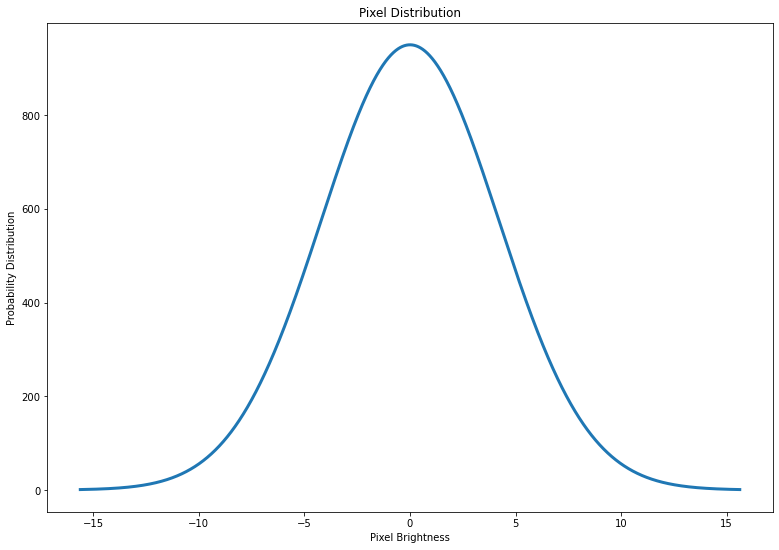

In [246]:
fig, ax = plt.subplots(1,1,figsize=(13,9))
ecks=np.linspace(stats.norm.ppf(0.0001,scale=w),stats.norm.ppf(1-0.0001,scale=w),int(10e3))
ax.set_title('Pixel Distribution')
ax.set_xlabel('Pixel Brightness')
ax.set_ylabel('Probability Distribution')
ax.plot(ecks,stats.norm.pdf(ecks,scale=w)*10e3,linewidth=3);

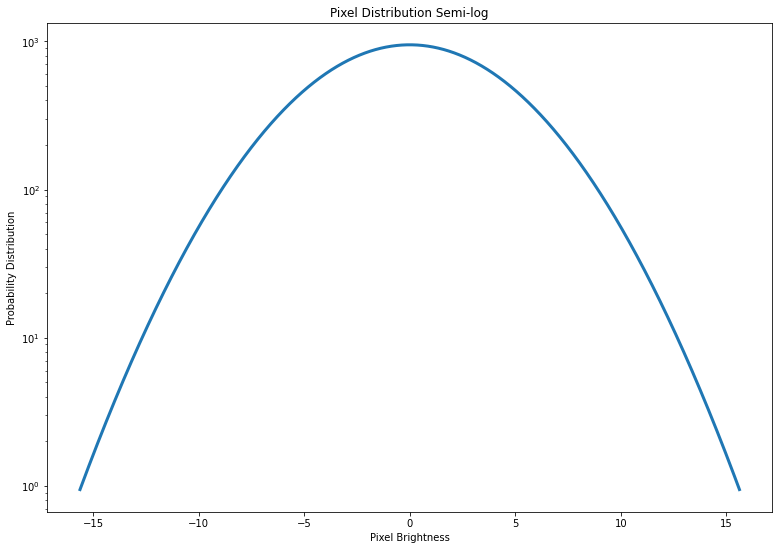

In [247]:
fig, ax = plt.subplots(1,1,figsize=(13,9))
ecks=np.linspace(stats.norm.ppf(0.0001,scale=w),stats.norm.ppf(1-0.0001,scale=w),int(10e3))
ax.set_title('Pixel Distribution Semi-log')
ax.set_xlabel('Pixel Brightness')
ax.set_ylabel('Probability Distribution')
ax.set_yscale('log')
ax.plot(ecks,stats.norm.pdf(ecks,scale=w)*10e3,linewidth=3);

## 3. C)



In [250]:
prob1= (1 - stats.norm.cdf(sn,scale=w))*10000
sig2=stats.norm.ppf(1-prob1)
sig2

2.34206414000027

Thus finding the probability of this event occuring within 10k pixels, we find that it is a 2.35 sigma event. Which means it is less rare to be found in an array of 10k pixels, than it is to be found in a single known pixel.
## Problem 4
We are now looking at the effects of a **trials factor** on a distribution. In the previous question we looked at 10k events in the form of pixels finding a significant event. Now we can find out how this impacts us finding a significant event.
## 4. A)
We are finding the signal strength of a 5-sigma event for only 1 trial.

In [251]:
sig5=1-stats.norm.cdf(5)
sosig=stats.norm.ppf(1-sig5,scale=w)
sosig

20.99999999987474

## 4. B) 
Here we are finding the signal strength of a 5-sigma event occurring in 10k trials.

In [252]:
s2=stats.norm.ppf(1-sig5/10e3,scale=w)
s2

27.512257444944954

## 4. C)
Discuss how much brighter the signal must be for discoverey if you have a trials factor of 10k.

Looking at your probability distributions, explain why the sensitivity penalty due to a trials factor is so low.

The signal must be 27/20 $\approx$ 1.3 times brighter for discovery if we use a trials factor of 10k. The sensitivity penalty is so low since the wings of the distribution are small and that when you move to larger values the height of the distribution does not change as drastically, like between the center and the wings of a Gaussian curve, where the values change drastically due to the slope.

In [253]:
s2/sosig

1.3101074973861457

## 4. D)
If you changed the trials factor significantly (orders of magnitude), how large is the effect on your 5-sigma sensitivity threshold?

As we can see an increase in magnitude only resulted in a 0.1 times increase between the original and factored distributions sensitivity threshold. This small increase can also be attributed to the wings small slope, as discussed in part C. We can see from the plot below we can see that a magnitude change takes a large change in x-values to make a more significant probability.

In [258]:
s3=stats.norm.ppf(1-sig5/10e5,scale=w)
s3

30.26806202822923

In [259]:
s3/sosig

1.4413362870671322

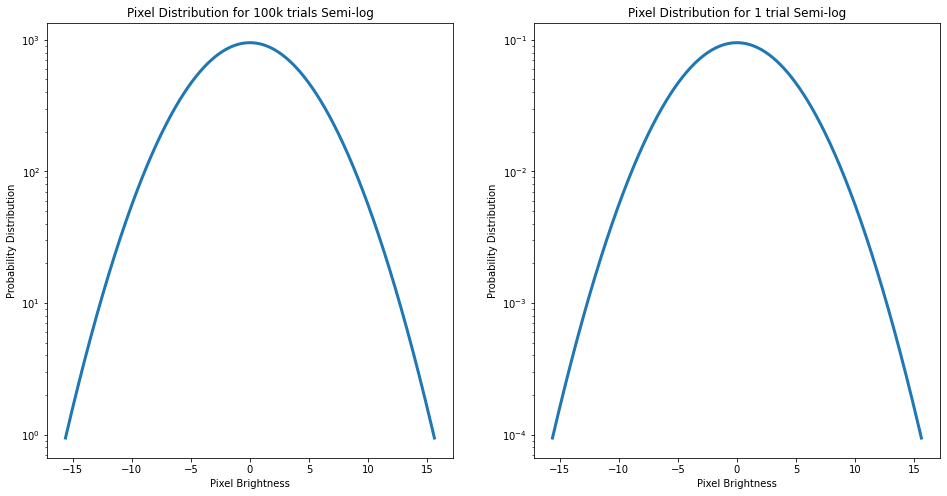

In [262]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ecks=np.linspace(stats.norm.ppf(0.0001,scale=w),stats.norm.ppf(1-0.0001,scale=w),int(10e3))
ax[0].set_title('Pixel Distribution for 100k trials Semi-log')
ax[0].set_xlabel('Pixel Brightness')
ax[0].set_ylabel('Probability Distribution')
ax[0].set_yscale('log')
ax[0].plot(ecks,stats.norm.pdf(ecks,scale=w)*10e3,linewidth=3);
ecks=np.linspace(stats.norm.ppf(0.0001,scale=w),stats.norm.ppf(1-0.0001,scale=w),int(10e3))
ax[1].set_title('Pixel Distribution for 1 trial Semi-log')
ax[1].set_xlabel('Pixel Brightness')
ax[1].set_ylabel('Probability Distribution')
ax[1].set_yscale('log')
ax[1].plot(ecks,stats.norm.pdf(ecks,scale=w),linewidth=3);